In [1]:
import cmaps
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap  import Basemap
from matplotlib import cm
import pandas as pd

from utils.const import ROOT, FILE_NAME, LONS, LATS
from utils.func import convert_date, plot_to_map
from utils.func import csv_to_masked_array as ctm

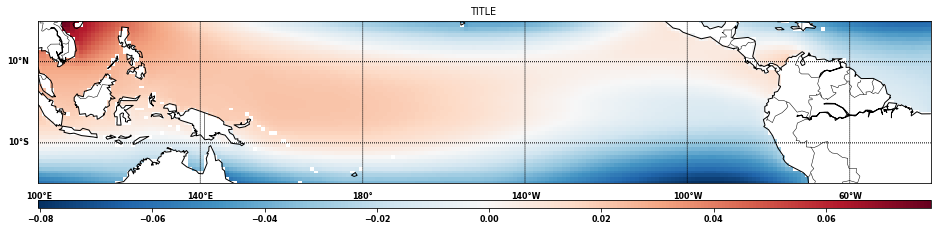

In [2]:
year_ssh = ctm("./season_average/summer/1992.csv")
for i in range(1993, 2018):
    y = ctm("./season_average/summer/{}.csv".format(i))
    year_ssh = npy.ma.append(year_ssh, y, axis=0)
year_ssh.shape

plot_to_map(LONS, LATS, year_ssh.sum(axis=0)/(2018-1992+1), set_cmaps="RdBu_r")

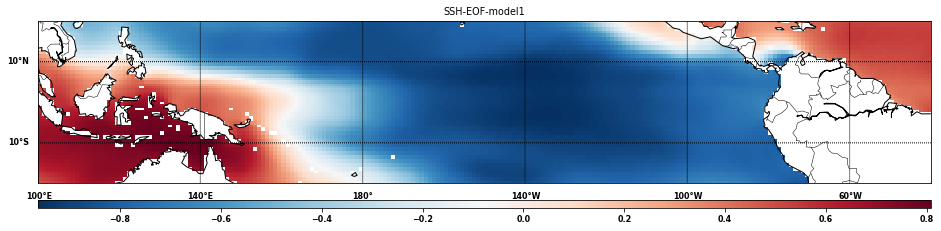

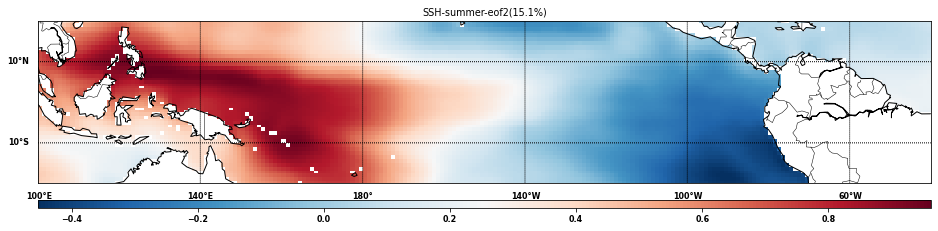

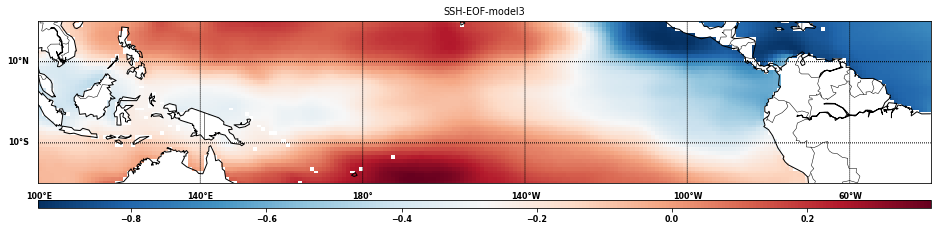

In [3]:
coslat = npy.cos(npy.deg2rad(LATS))
wgts = npy.sqrt(coslat)[..., npy.newaxis]

solver = Eof(year_ssh, weights=wgts)

eof = solver.eofsAsCorrelation(neofs=3)
pc = solver.pcs(npcs=3, pcscaling=1)
var = solver.varianceFraction()

plot_to_map(LONS, LATS, eof[0,:,:], fig_title="SSH-EOF-model1", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[1,:,:], fig_title="SSH-summer-eof2(15.1%)", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[2,:,:], fig_title="SSH-EOF-model3", set_cmaps="RdBu_r")

In [4]:
var

array([5.26483434e-01, 1.51286221e-01, 1.28261719e-01, 5.03401958e-02,
       3.43245517e-02, 2.80965782e-02, 1.55597726e-02, 1.12064897e-02,
       9.33149015e-03, 7.41657958e-03, 6.84834118e-03, 5.92829807e-03,
       4.67802583e-03, 3.82296576e-03, 3.10113499e-03, 2.52979893e-03,
       2.09633463e-03, 1.82373057e-03, 1.68825232e-03, 1.26594860e-03,
       9.86367414e-04, 8.65828297e-04, 7.24330147e-04, 7.11337226e-04,
       6.22273932e-04, 4.18681533e-31])

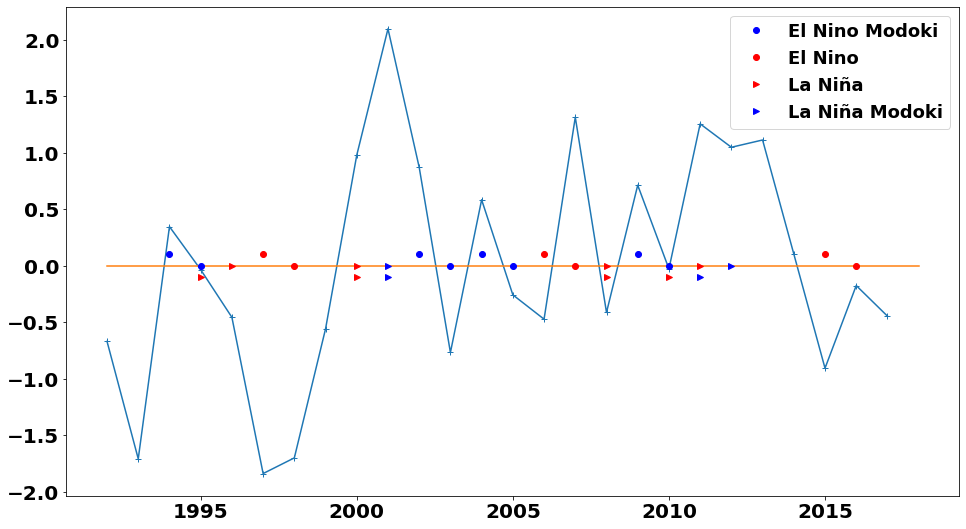

In [5]:
plt.figure(figsize=(16,9))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot(npy.arange(1992, 2018), pc[:,1], "+-")
# plt.plot(npy.arange(1992, 2018), pc[:,1])
plt.plot([1992, 2018], [0,0])
# plt.plot([1994, 1997, 2002, 2004, 2006, 2009, 2014], [0,0,0,0,0,0,0], 'o')
# plt.plot([1995, 1998, 1999, 2000, 2007, 2010, 2011], [0,0,0,0,0,0,0], ">")
plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo", label="El Nino Modoki")
plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro", label="El Nino")
plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>", label="La Niña")
plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>", label="La Niña Modoki")
plt.legend(fontsize=18)

In [6]:
pc[:,1]

array([-0.66912276, -1.70844043,  0.34651857, -0.03425065, -0.45598724,
       -1.83872814, -1.69996113, -0.55815114,  0.97931421,  2.09713455,
        0.87111319, -0.76727778,  0.58430048, -0.25730104, -0.47254821,
        1.31468222, -0.41290469,  0.71324345, -0.02741695,  1.25601222,
        1.04874728,  1.11316334,  0.1046773 , -0.90640571, -0.17490068,
       -0.44551025])